# Stochastic Gradient Descent

Consider a function that depends on a number of variables $\vec{x}$ and parameters ${\bf w}$,
$$
f_{ {\bf w} }(\vec{x} ) \;,
$$
with the parameters not only affecting the values of the function but  **defining** it (e.g. consider $f_{a}(x) = x^a$).  Consider also another function that depends on $f_{\bf w}$, but not $\vec{x}$ (e.g. by averaging over $\vec{x}$), i.e. $E[f_{\bf w}]$. How do we minimize $E[f_{\bf w}]$? This can be done by taking  $E({\bf w})=E[f_{\bf w}]$, and using (for example) *Gradient Descent* (GD) to find ${\bf w}$ that minimize $E$.

In the case of $E[f_{\bf w}] = \dfrac{1}{n}\displaystyle \sum_{i=0}^{n} Q[ f_{\bf w}(\vec{x}_i)]$, GD becomes (in principle) very expensive as $n \to \infty$, as the parameters are updated using 
$$
{\bf w}^{\prime} = {\bf w} - \alpha {\bf \nabla}_{\bf w} E[f_{\bf w}] \Rightarrow \\
%
{\bf w}^{\prime} = {\bf w} - \dfrac{\alpha}{n} {\bf \nabla}_{\bf w} \displaystyle\sum_{i}^{n} Q[f_{\bf w}(\vec{x})_i] \; ,
$$
i.e. we need to compute the sum at each step. 

However, instead of computing the sum at each step, we can randomly choose a point $\vec{x}_i$, and update ${\bf w}$ using
$$
{\bf w}^{\prime} = {\bf w} - \alpha {\bf \nabla}_{\bf w} Q[f_{\bf w}(\vec{x})_i] \; .
$$
This is the *Stochastic Gradient Descent* (SGD) algorithm. The idea here is that after $N$ updates, as $N \to \infty$, the steps converge to $\Delta{\bf w}= - \dfrac{\alpha}{N} \displaystyle\sum_{i}^{N}{\bf \nabla}_{\bf w} Q[f_{\bf w}(\vec{x})_i] \approx -\alpha {\bf \nabla}_{\bf w} E[f_{\bf w}]$.


Let's see how it works, by constructing a class!


In order to make it consistent  with the GD algorithm, we will use the definition
$$
Q[f_{\bf w}(\vec{x})] \equiv Q(\vec{x};{\bf w}) \;,
$$
which results to 
$$
{\bf w}^{\prime} = {\bf w} - \alpha {\bf \nabla}_{\bf w} Q(\vec{x}_i;{\bf w}) \;,
$$
for $\vec{x}_i$ random from $\{\vec{x}_1, \vec{x}_2, \dots ,\vec{x}_n \}$.


In [1]:
import numpy as np


import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

In [2]:
class GradientDescent:
    '''This is inteded to be used as a base class for a class that describes the Loss function'''
    
    def next_step(self,alpha=1e-2):
        '''alpha: the alpha parameter'''
        
        grad=self.Grad()
        x = [ self.position(i) - alpha*g for i,g in enumerate(grad)]
        self.update(x)

        return grad
        
        
    
    
    def run(self, alpha=1e-2,tol=1e-5, step_break=100):
        '''        
        alpha: the alpha parameter
        tol, step_break: stop when the gradient becomes smaller than tol/alpha for step_break consecutive steps
        '''
        _s=0
        
        self.steps=[]#store the steps here
        
        while True:
            grad=self.next_step(alpha)
            
            _check= np.sqrt(np.sum([_**2 for _ in grad] ))
            
            self.steps.append([self.position(i) for i,g in enumerate(grad)])
            
            if _check<tol/alpha:
                _s+=1
            else:
                _s=0
            
            if _s>step_break:
                break
        
        
        return [self.position(i) for i,g in enumerate(grad)]

In [3]:
class func:
    '''
    This is how the function should look like.
    The key point is to have way to update the parameters w.
    '''
    def __init__(self,testFunc,dim):
        self.f=testFunc
        self.w=[np.random.rand() for _ in range(dim)]
    
    
    
    def __call__(self,x):
        return self.f(self,x)

In [4]:
class Loss(GradientDescent):
    '''Defines the loss function and inherits update and run from GradientDescent'''
    def __init__(self,lossFunction,func,data,h=1e-5):
        '''
        lossFunction: the definition of the loss function (the signature should be (func,input,output) )
        func,data: function to fit to data
            func.w should be the parameters that define the function  
        '''
        self.Q=lossFunction
        self.function =func
        self.data =data
        self.h=h

        self.dim=len(func.w)
        self.data_size=len(data)
        
    def __call__(self,i):
        x=self.data[i][0]
        t=self.data[i][1]
        return self.Q(self.function,x,t)
    
    def update(self,wnew):
        self.function.w=[_ for _ in wnew]

    def position(self,i):
        return self.function.w[i]
            
    def Grad(self):
        grad=[]
        index=np.random.randint(self.data_size)
        for dim in range(self.dim):
            
            #take the devivative by changing w[dim]
            self.function.w[dim]-=self.h
            dQdw0=self(index)

            #the above step below is equivalent to the above, commented-out, steps
            self.function.w[dim]+=2*self.h
            dQdw1=self(index) 
            
            #return w to its current value
            self.function.w[dim]-=self.h

            grad.append((dQdw1-dQdw0)/(2*self.h))
            
            
        
        return grad
            
        

In [5]:
def testFunc(self,x):
    return [x[0]*self.w[0]+ self.w[1]]


In [6]:
f=func(testFunc,2)

data=[]
xmin=-5
xmax=2
for i in range(1000):
    x=np.random.rand()*(xmax-xmin)+xmin
    data.append( [[x],[2*x+3]])

Q=Loss(lambda g,x,t: np.mean([(g(x)[i] - _t)**2 for i,_t in enumerate(t)]) , f,data)


In [7]:
Q.run(alpha=1e-2,tol=1e-5, step_break=100)

[1.99999188126423, 2.9999524432770865]

<IPython.core.display.Javascript object>


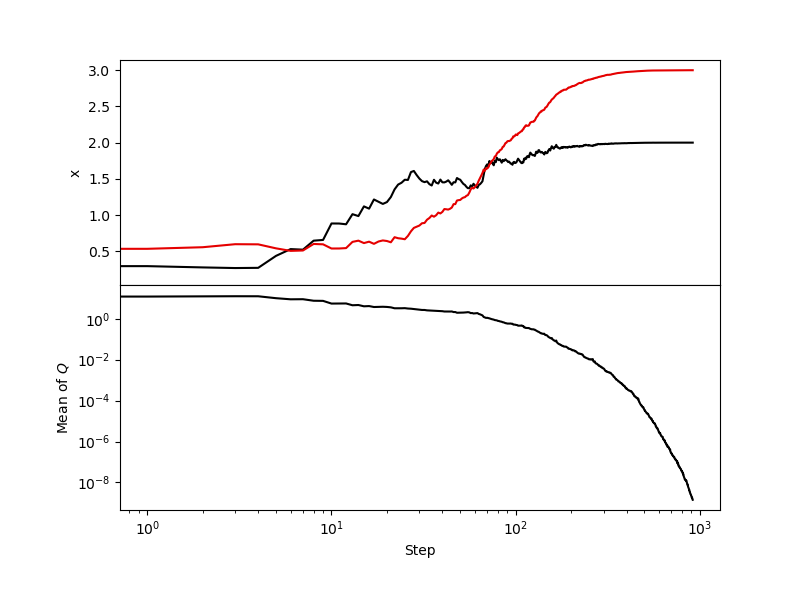

In [8]:
fig=plt.figure(figsize=(8,6))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.1,hspace=0)
#=============================================================================#


sub = fig.add_subplot(211)
sub.get_xaxis().set_visible(False)
sub.plot(np.array(Q.steps)[:,0],c='xkcd:black')
sub.plot(np.array(Q.steps)[:,1],c='xkcd:red')

sub.set_ylabel('x')
sub.set_xscale('log')
sub.set_yscale('linear')


sub = fig.add_subplot(212)
meanQ=[]
for w in Q.steps:
    Q.update(w)
    _=np.mean( [Q(i) for i in range(Q.data_size)] )
    meanQ.append(_)
sub.plot(meanQ,c='xkcd:black')

sub.set_ylabel('Mean of $Q$')

sub.set_xscale('log')
sub.set_yscale('log')

sub.set_xlabel('Step')

plt.show()

# Function approximation

The observation above can be used to find approximations of a function. For example, consider the problem of finding an approximation of a function that obeys $G_1[f(\vec{x})] = G_2[f(\vec{x})]$ (inside a given region of $\vec{x}$). We could, then, define $f_{\bf w}(\vec{x})$, and minimize $E[f_{\bf w}] = \dfrac{1}{n}\displaystyle \sum_{i=0}^{n} Q[ f_{\bf w}(\vec{x}_i)]$ (for a lot of points in the region of interest) with $Q=(G_1 - G_2)^2$ by and adjusting ${\bf w}$ following SGD. As $n \to \infty$, we should end up with a set of ${\bf w}$ that define a function with $G_1[f_{\bf w}(\vec{x})] \approx G_2[f_{\bf w}(\vec{x})]$.


Notice that if we only generated data when needed, we could skip the initial generation of $n$ points.

Let's try to find $f(x)$ so that $f(x)=1/f(x)$ $x \in [-1,1]$. To do this we define $Q[f_{\bf w}]=\Big(f_{\bf w}(x)-1/f_{\bf w}(x) \Big)^2$.

To do this, we define $f_{\bf w} \equiv w_0 x + w_1$. Since the answer is $f(x)= \pm 1$, we expect $w_0=0$ and $w_1 = \pm 1$.

In [9]:
def testFunc(self,x):
    return [x[0]*self.w[0]+ self.w[1]]

In [10]:
f=func(testFunc,2)

data=[]
xmin=-5
xmax=2

for i in range(1000):
    x=np.random.rand()*(xmax-xmin)+xmin
    data.append( [[x],[0]])

Q=Loss(lambda g,x,t: np.mean([(g(x)[i] - 1/(g(x)[i]))**2 for i,_t in enumerate(t)]) , f,data)

In [11]:
Q.run(alpha=1e-2,tol=1e-5, step_break=100)

[4.159704606124018e-08, 1.0000001410651433]

<IPython.core.display.Javascript object>


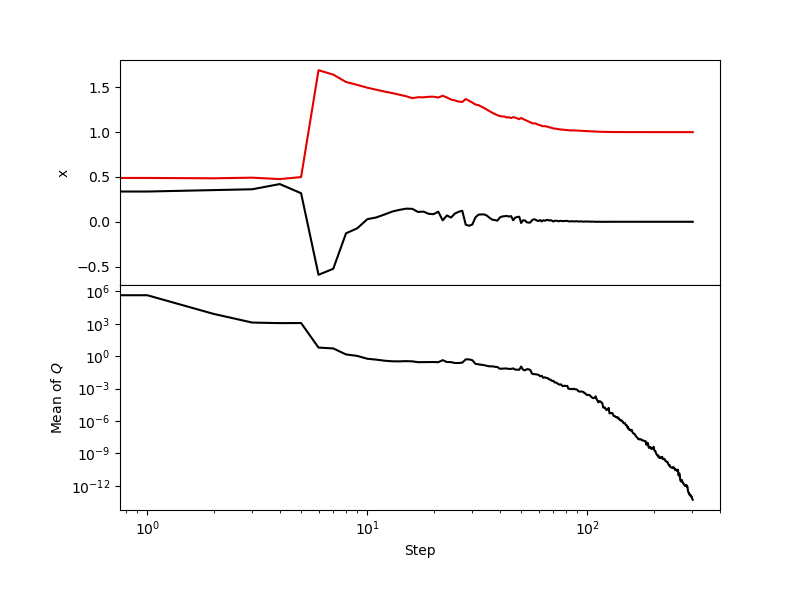

In [12]:
fig=plt.figure(figsize=(8,6))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.1,hspace=0)
#=============================================================================#


sub = fig.add_subplot(211)
sub.get_xaxis().set_visible(False)
sub.plot(np.array(Q.steps)[:,0],c='xkcd:black')
sub.plot(np.array(Q.steps)[:,1],c='xkcd:red')

sub.set_ylabel('x')
sub.set_xscale('log')
sub.set_yscale('linear')


sub = fig.add_subplot(212)
meanQ=[]
for w in Q.steps:
    Q.update(w)
    _=np.mean( [Q(i) for i in range(Q.data_size)] )
    meanQ.append(_)
sub.plot(meanQ,c='xkcd:black')

sub.set_ylabel('Mean of $Q$')

sub.set_xscale('log')
sub.set_yscale('log')

sub.set_xlabel('Step')

plt.show()